In [55]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import pearsonr, spearmanr, mannwhitneyu

# 1 Выгрузка

In [56]:
df_orders = pd.read_excel('C:/Users/Roman/SkyPro/!Diplom/Новый диплом датасет.xlsx', sheet_name='Данные')
df_clients = pd.read_excel('C:/Users/Roman/SkyPro/!Diplom/Новый диплом датасет.xlsx', sheet_name='Clients')
df_reg = pd.read_excel('C:/Users/Roman/SkyPro/!Diplom/Новый диплом датасет.xlsx', sheet_name='Region_dict')


# 1.1 Изучение данных 

In [57]:
df_clients.head(5)

,id_client,dtime_ad,nflag_test,id_trading_point
0,180844,2022-06-08 18:38:41.414,0,212
1,193942,NaT,0,13
2,226069,2022-07-11 16:28:38.511,1,54
3,183981,2022-06-16 12:23:59.289,1,991
4,322530,2022-07-08 08:56:08.714,0,1015


In [58]:
df_orders.head(5)

,id_order,id_client,amt_payment,dtime_pay
0,162295,203943.0,2802.0,2022-10-17 20:38:22.304000
1,185621,206742.0,4404.0,2022-12-13 09:47:43.880000
2,267875,183601.0,5192.0,2022-09-07 11:14:52.440000
3,173557,203446.0,2438.0,2022-09-07 08:23:40.021000
4,239130,188188.0,2488.0,2022-09-06 00:16:37.306000


In [59]:
df_reg.head(5)

,id_trading_point,city
0,1,Петрозаводск
1,2,Дмитров
2,4,Чехов
3,7,Ростов Великий
4,11,Владимир


# 1.2.   Изучение  таблиц и проверка их на наличие пустых значений.

In [60]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55605 entries, 0 to 55604
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55605 non-null  int64         
 1   dtime_ad          55356 non-null  datetime64[ns]
 2   nflag_test        55605 non-null  int64         
 3   id_trading_point  55605 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.7 MB


In [61]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38691 entries, 0 to 38690
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_order     38691 non-null  int64  
 1   id_client    38103 non-null  float64
 2   amt_payment  36536 non-null  float64
 3   dtime_pay    36519 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ MB


In [62]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_trading_point  66 non-null     int64 
 1   city              66 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [63]:
df_orders.isnull().any()

id_order       False
id_client       True
amt_payment     True
dtime_pay       True
dtype: bool

In [64]:
df_orders.isnull().any()

id_order       False
id_client       True
amt_payment     True
dtime_pay       True
dtype: bool

# 1.3 Исключение нулловых значений

In [65]:
df_orders_0= df_orders[~((df_orders['id_client'].isnull()) | (df_orders['amt_payment'].isnull()) | (df_orders['dtime_pay'].isnull()))]

In [66]:
df_orders_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36519 entries, 0 to 38690
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_order     36519 non-null  int64  
 1   id_client    36519 non-null  float64
 2   amt_payment  36519 non-null  float64
 3   dtime_pay    36519 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.4+ MB


In [67]:
df_cleints_0= df_clients[~df_clients['dtime_ad'].isnull()]

In [68]:
df_cleints_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55356 entries, 0 to 55604
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55356 non-null  int64         
 1   dtime_ad          55356 non-null  datetime64[ns]
 2   nflag_test        55356 non-null  int64         
 3   id_trading_point  55356 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.1 MB


# 1.4 Исследование количесвта торговых точек в каждом городе с визализацией

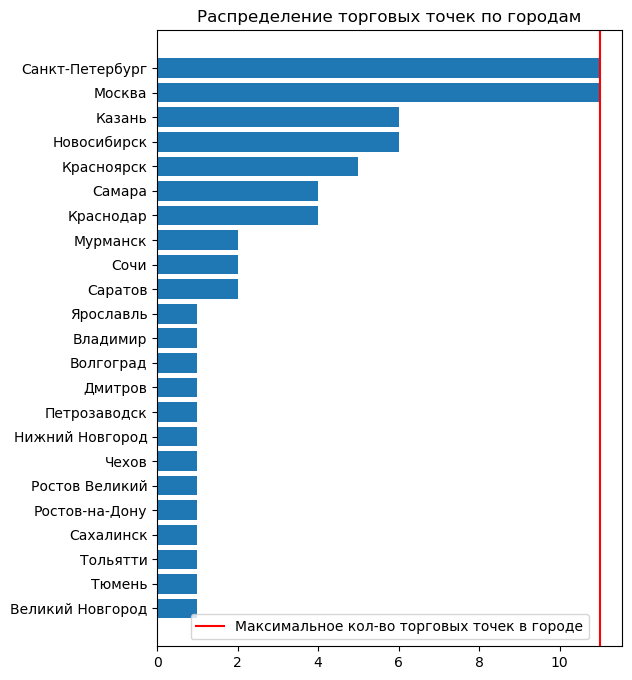

In [69]:
city_points = df_reg.groupby(['city']).count()['id_trading_point'].reset_index().sort_values(by = 'id_trading_point', ascending = True)
city_points

fig, (ax) = plt.subplots(figsize=(6, 8))

ax.barh(city_points['city'], city_points['id_trading_point'])
ax.set_title('Распределение торговых точек по городам')
plt.axvline(max(city_points['id_trading_point']), color = 'red', label = 'Максимальное кол-во торговых точек в городе')
plt.legend(loc = 'lower center')
plt.show()

# 2. Объединение таблиц

In [70]:
df = df_orders_0.merge(df_cleints_0, on = 'id_client', how = 'outer')

In [71]:
df=df.merge(df_reg, on = 'id_trading_point')
df.head(5)

,id_order,id_client,amt_payment,dtime_pay,dtime_ad,nflag_test,id_trading_point,city
0,162295.0,203943.0,2802.0,2022-10-17 20:38:22.304000,2022-08-05 09:09:24.385,0.0,1654.0,Москва
1,187294.0,203943.0,3533.0,2022-11-09 23:10:52.843000,2022-08-05 09:09:24.385,0.0,1654.0,Москва
2,195611.0,203943.0,5894.0,2022-09-05 00:52:09.084000,2022-08-05 09:09:24.385,0.0,1654.0,Москва
3,216912.0,190290.0,2592.0,2022-10-05 08:54:19.040000,2022-07-02 04:12:44.518,0.0,1654.0,Москва
4,164710.0,189131.0,899.0,2022-08-06 01:27:54.690000,2022-06-29 07:22:48.384,0.0,1654.0,Москва


In [72]:
df['amt_payment']=df['amt_payment'].fillna(0)

In [73]:
df_cl=df.groupby(['id_client','id_trading_point', 'city']).agg({'id_order':'count','amt_payment':'sum'}).reset_index()

In [74]:
df_cl

,id_client,id_trading_point,city,id_order,amt_payment
0,178561.0,453.0,Санкт-Петербург,1,3052.0
1,178562.0,2652.0,Москва,1,2439.0
2,178563.0,112.0,Санкт-Петербург,1,768.0
3,178564.0,26.0,Ростов-на-Дону,0,0.0
4,178565.0,739.0,Новосибирск,1,958.0
...,...,...,...,...,...
55351,331949.0,573.0,Санкт-Петербург,0,0.0
55352,331950.0,1654.0,Москва,0,0.0
55353,331954.0,544.0,Казань,0,0.0
55354,331955.0,72.0,Сочи,0,0.0


In [75]:
df_fin=df_cl.merge(df_cleints_0[['id_client','dtime_ad','nflag_test']], on ='id_client')

In [76]:
df_fin

,id_client,id_trading_point,city,id_order,amt_payment,dtime_ad,nflag_test
0,178561.0,453.0,Санкт-Петербург,1,3052.0,2022-06-03 02:47:49.183,0
1,178562.0,2652.0,Москва,1,2439.0,2022-06-03 02:51:21.878,0
2,178563.0,112.0,Санкт-Петербург,1,768.0,2022-06-03 02:52:10.616,1
3,178564.0,26.0,Ростов-на-Дону,0,0.0,2022-06-03 02:53:10.089,1
4,178565.0,739.0,Новосибирск,1,958.0,2022-06-03 02:55:13.525,1
...,...,...,...,...,...,...,...
55351,331949.0,573.0,Санкт-Петербург,0,0.0,2022-07-15 10:07:09.632,1
55352,331950.0,1654.0,Москва,0,0.0,2022-07-18 03:10:18.517,1
55353,331954.0,544.0,Казань,0,0.0,2022-07-08 12:45:17.300,0
55354,331955.0,72.0,Сочи,0,0.0,2022-08-12 03:15:49.011,0


In [77]:
df_fin['nflag_paid']=np.where(df_fin['amt_payment'] > 0, 1, 0)

In [78]:
df_fin

,id_client,id_trading_point,city,id_order,amt_payment,dtime_ad,nflag_test,nflag_paid
0,178561.0,453.0,Санкт-Петербург,1,3052.0,2022-06-03 02:47:49.183,0,1
1,178562.0,2652.0,Москва,1,2439.0,2022-06-03 02:51:21.878,0,1
2,178563.0,112.0,Санкт-Петербург,1,768.0,2022-06-03 02:52:10.616,1,1
3,178564.0,26.0,Ростов-на-Дону,0,0.0,2022-06-03 02:53:10.089,1,0
4,178565.0,739.0,Новосибирск,1,958.0,2022-06-03 02:55:13.525,1,1
...,...,...,...,...,...,...,...,...
55351,331949.0,573.0,Санкт-Петербург,0,0.0,2022-07-15 10:07:09.632,1,0
55352,331950.0,1654.0,Москва,0,0.0,2022-07-18 03:10:18.517,1,0
55353,331954.0,544.0,Казань,0,0.0,2022-07-08 12:45:17.300,0,0
55354,331955.0,72.0,Сочи,0,0.0,2022-08-12 03:15:49.011,0,0


# 3. Автоматизация статистических вычислений

In [79]:
def mann_whitney_func(r1, r2, alpha=.05):
    
    s, p = mannwhitneyu(r1, r2)
    
    if p<alpha:
        print('Распределения не равны')
    else:
        print('Распределения равны')
        
    return s, p

In [80]:
def test_calc(r1, r2, alpha=.05):
    
    s, p = ttest_ind(r1, r2)
    
    if p<alpha:
        print('Гипотеза H0 не подтверждается: средние не равны')
        print('Разница средних = ', r1.mean(), r2.mean())
    else:
        print('Гипотеза H0  подтверждается: средние равны')
        print('Разница средних = 0')
    return s, p

# 4.Чистка неверно заполненных точек

In [81]:
payment_points_0 = []

In [82]:
for i in df_fin['id_trading_point'].unique():
    df_loc = df_fin[df_fin['id_trading_point']==i]
    sum_a = df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==0)].sum()['amt_payment'].sum()
    sum_b = df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==1)].sum()['amt_payment'].sum()
    if (sum_a == 0) | (sum_b == 0):
        payment_points_0.append(i)
print(payment_points_0)

C:\Users\Roman\AppData\Local\Temp\ipykernel_21300\6058793.py:3: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_a = df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==0)].sum()['amt_payment'].sum()
C:\Users\Roman\AppData\Local\Temp\ipykernel_21300\6058793.py:4: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_b = df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==1)].sum()['amt_payment'].sum()
C:\Users\Roman\AppData\Local\Temp\ipykernel_21300\6058793.py:3: FutureWarning: The default value of numeric_only

[26.0, 739.0, 866.0, 46.0, 1099.0, 1015.0, 603.0, 810.0, 800.0, 228.0, 1.0, 13.0, 23.0, 4.0, 7.0]


C:\Users\Roman\AppData\Local\Temp\ipykernel_21300\6058793.py:4: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_b = df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==1)].sum()['amt_payment'].sum()
C:\Users\Roman\AppData\Local\Temp\ipykernel_21300\6058793.py:3: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_a = df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==0)].sum()['amt_payment'].sum()
C:\Users\Roman\AppData\Local\Temp\ipykernel_21300\6058793.py:4: FutureWarning: The default value of numeric_only

In [83]:
print(payment_points_0)

[26.0, 739.0, 866.0, 46.0, 1099.0, 1015.0, 603.0, 810.0, 800.0, 228.0, 1.0, 13.0, 23.0, 4.0, 7.0]


In [84]:
emty_group_points = []
for i in df_fin['id_trading_point'].unique():
    c_a =df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==0)].count()['id_client'].sum()
    c_b =df_fin[(df_fin['id_trading_point']==i) & (df_fin['nflag_test']==1)].count()['id_client'].sum()
    if (c_a == 0) | (c_b == 0):
        emty_group_points.append(i)
print(emty_group_points)

[739.0, 866.0, 1099.0, 1015.0, 603.0, 810.0, 800.0, 228.0]


# 5. Расчет общих результатов АБ Теста

In [85]:
df_fin = df_fin[~df_fin['id_trading_point'].isin(emty_group_points + payment_points_0)]

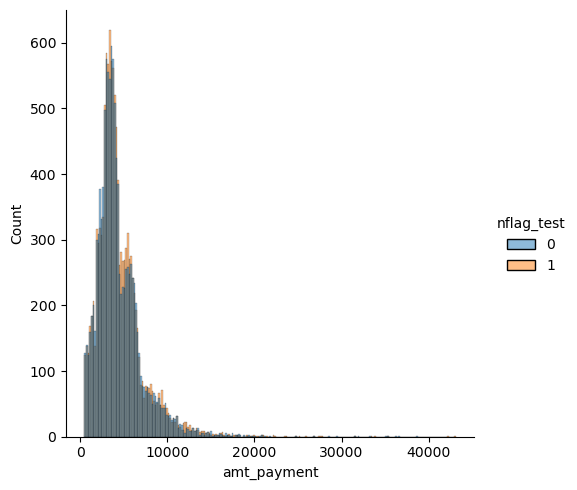

In [86]:
sns.displot(df_fin[df_fin['amt_payment'] > 0], x = 'amt_payment', hue='nflag_test')

In [87]:
test_calc(df_fin[df_fin['nflag_test']==1]['amt_payment'], df_fin[df_fin['nflag_test']==0]['amt_payment'])

Гипотеза H0 не подтверждается: средние не равны
Разница средних =  2452.2773446201827 2293.36610851222


(5.663915722973564, 1.488511135509387e-08)

In [88]:
test_calc(df_fin[df_fin['nflag_test']==1]['nflag_paid'], df_fin[df_fin['nflag_test']==0]['nflag_paid'])

Гипотеза H0 не подтверждается: средние не равны
Разница средних =  0.5432835820895522 0.5180780833296901


(5.377160738040539, 7.604318948190198e-08)

In [89]:
mann_whitney_func(df_fin[df_fin['nflag_test']==1]['amt_payment'], df_fin[df_fin['nflag_test']==0]['amt_payment'])

Распределения не равны


(264700600.0, 1.246458969497137e-09)

# 5. Сегментация результатов АБ Теста

In [107]:
df_fin['nflag_check'] = np.where((df_fin['amt_payment'] <= 2000), 'Small'
                                   ,np.where((df_fin['amt_payment'] >= 10000), 'Big', 'Middle'))
df_fin.head(5)

C:\Users\Roman\AppData\Local\Temp\ipykernel_21300\2092627115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin['nflag_check'] = np.where((df_fin['amt_payment'] <= 2000), 'Small'


,id_client,id_trading_point,city,id_order,amt_payment,dtime_ad,nflag_test,nflag_paid,nflag_ckeck,nflag_check
0,178561.0,453.0,Санкт-Петербург,1,3052.0,2022-06-03 02:47:49.183,0,1,Middle,Middle
1,178562.0,2652.0,Москва,1,2439.0,2022-06-03 02:51:21.878,0,1,Middle,Middle
2,178563.0,112.0,Санкт-Петербург,1,768.0,2022-06-03 02:52:10.616,1,1,Small,Small
6,178567.0,453.0,Санкт-Петербург,1,2663.0,2022-06-03 03:02:56.855,0,1,Middle,Middle
7,178568.0,3786.0,Москва,3,13537.0,2022-06-03 03:05:33.476,1,1,Big,Big


Санкт-Петербург

Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  453.0 0.5240386192152271
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  112.0 0.07215173668770118
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  117.0 0.9519315788404847
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  309.0 0.270564123384287
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  576.0 0.27990080188577676
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  900.0 0.4939479351832292
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  213.0 0.6440239302455955
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  801.0 0.8435623119741573
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  2252.35 2929.045197

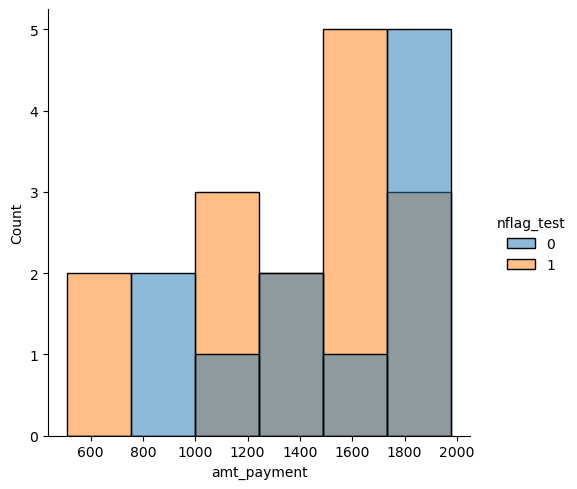

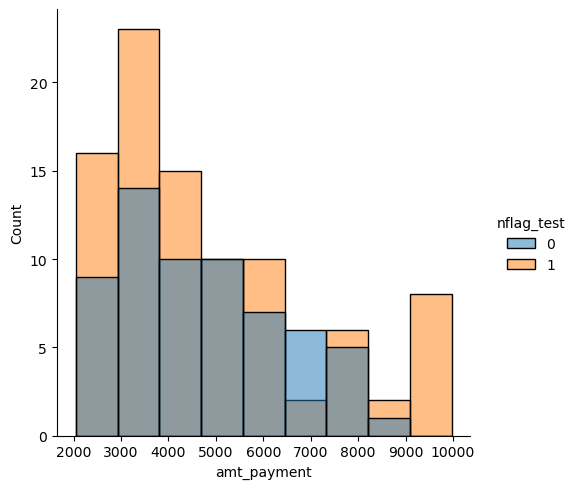

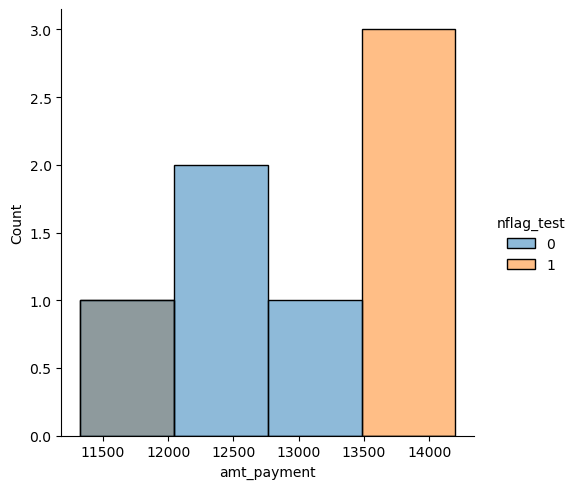

Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  891.0 0.7006710214335752
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  394.0 0.6468695203054496
Москва

Гипотеза H0 не подтверждается: средние не равны
Разница средних =  1972.8476793248944 2506.616805983282
Номер торговой точки =  2652.0 2.0059224232258568e-11
Номер торговой точки =  2652.0 Small Check
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  143.23564064801178 206.1166207529844
Номер торговой точки =  2652.0 Middle Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  2652.0 Big Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0


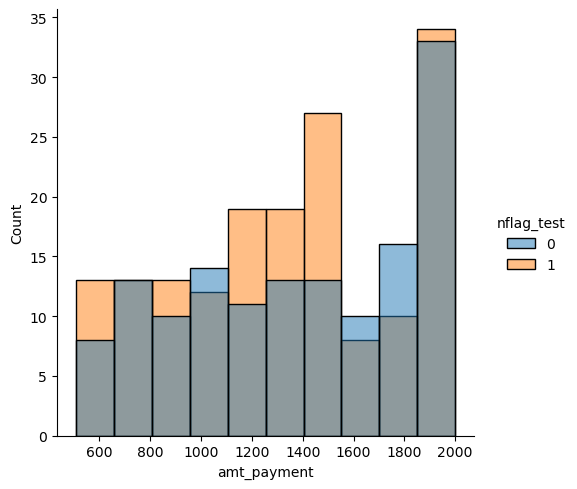

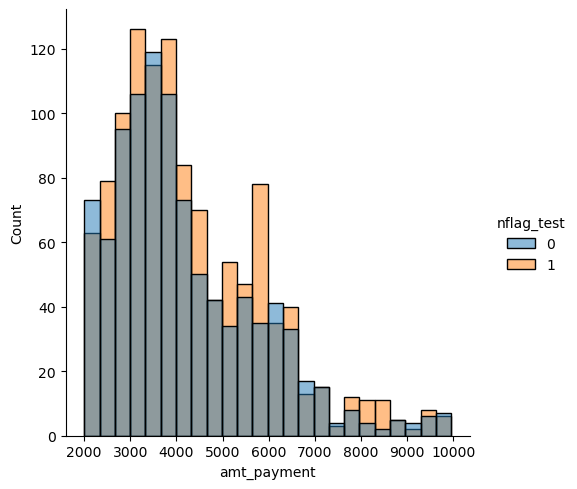

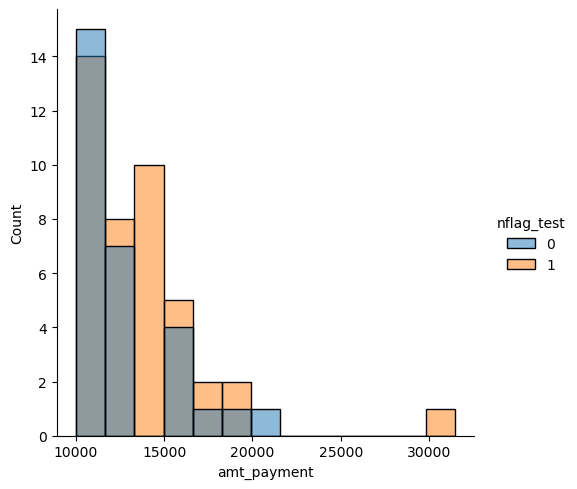

Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  3786.0 0.7815857297661141
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  1394.6554621848738 2128.556756756757
Номер торговой точки =  1287.0 3.876566044301065e-05
Номер торговой точки =  1287.0 Small Check
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  117.50607287449392 272.9656862745098
Номер торговой точки =  1287.0 Middle Check
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  3895.330188679245 4274.331288343558
Номер торговой точки =  1287.0 Big Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0


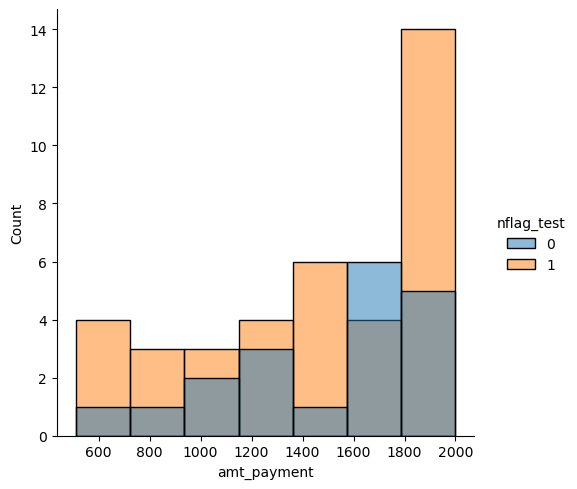

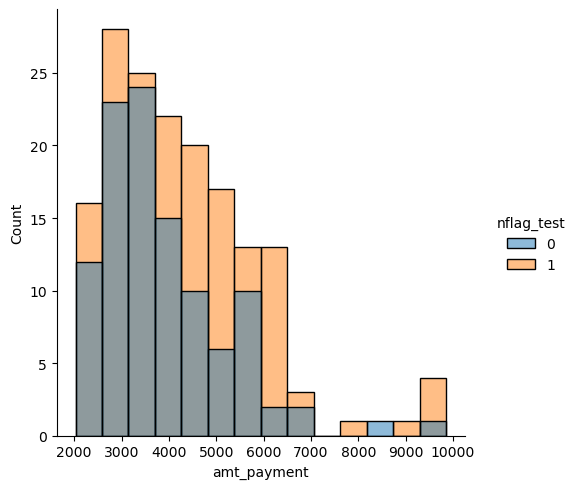

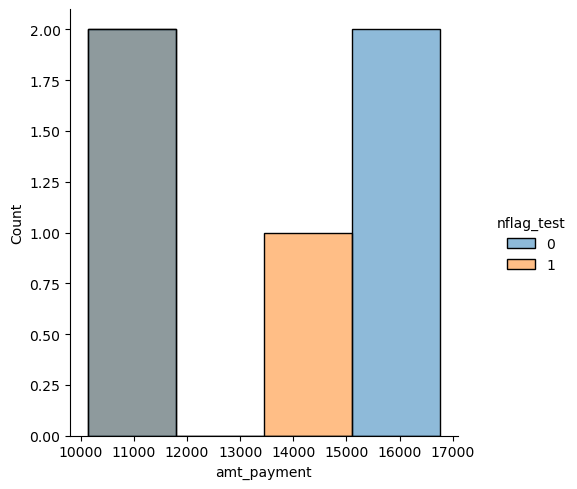

Гипотеза H0 не подтверждается: средние не равны
Разница средних =  2507.8864516129033 3132.301627033792
Номер торговой точки =  1654.0 6.050970845492351e-05
Номер торговой точки =  1654.0 Small Check
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  216.48108108108107 62.4384858044164
Номер торговой точки =  1654.0 Middle Check
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  4283.556122448979 4674.561135371179
Номер торговой точки =  1654.0 Big Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0


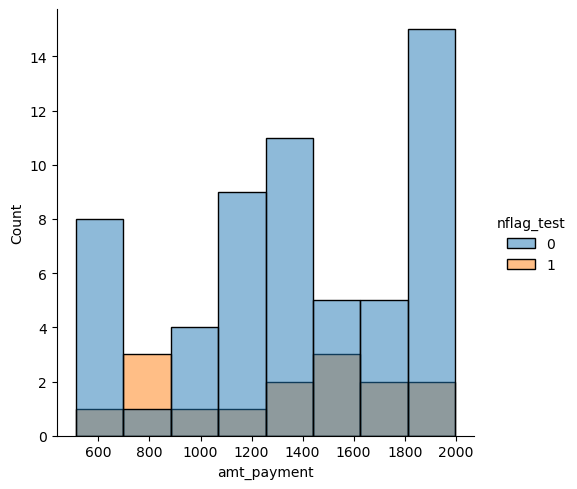

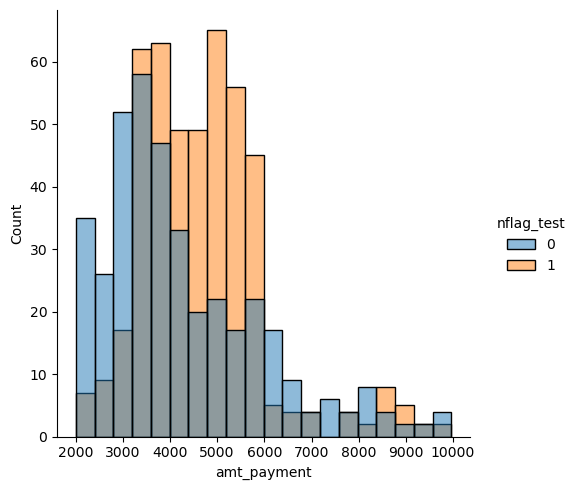

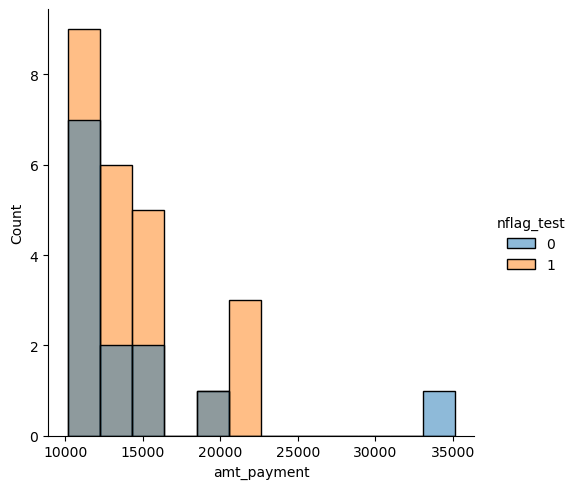

Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  3987.0 0.7780070273603263
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  2212.0 0.7119719350975426
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  8543.0 0.8663043555057068
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  6543.0 0.18197815948321544
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  9121.0 0.716046384232031
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  1844.787234042553 4121.753623188406
Номер торговой точки =  1002.0 1.1223868363766535e-09
Номер торговой точки =  1002.0 Small Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  1002.0 Middle Check
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  4338.816901408451 5218.670588235294
Номер торговой точки =  1

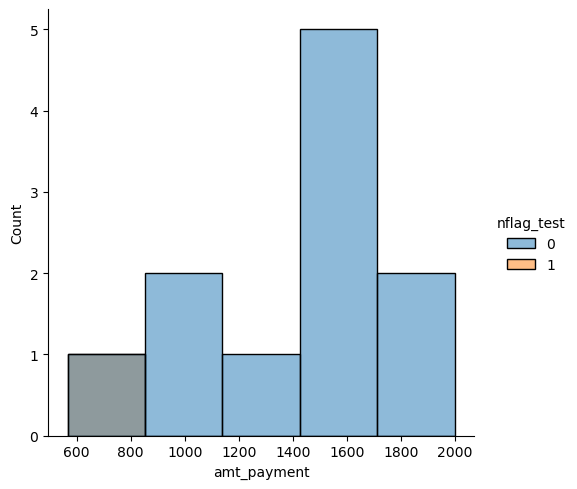

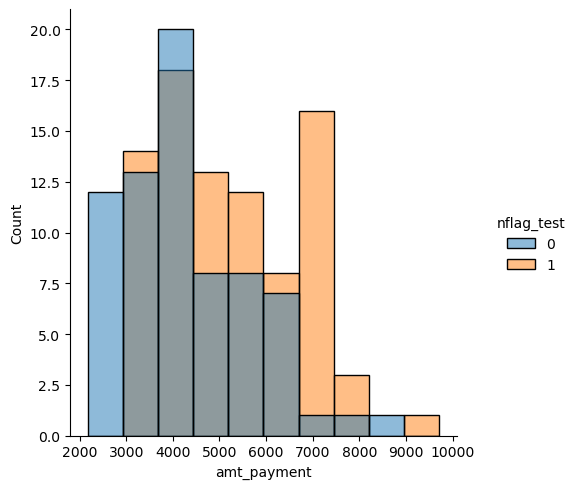

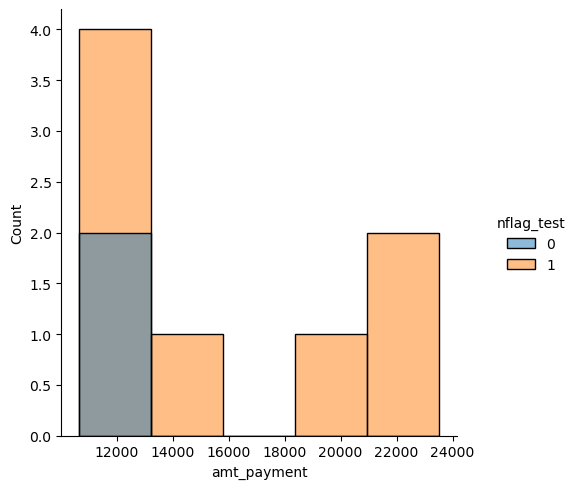

Гипотеза H0 не подтверждается: средние не равны
Разница средних =  1968.6934306569342 1415.7843137254902
Номер торговой точки =  9931.0 0.034929468998951815
Номер торговой точки =  9931.0 Small Check
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  154.0 0.0
Номер торговой точки =  9931.0 Middle Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  9931.0 Big Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0


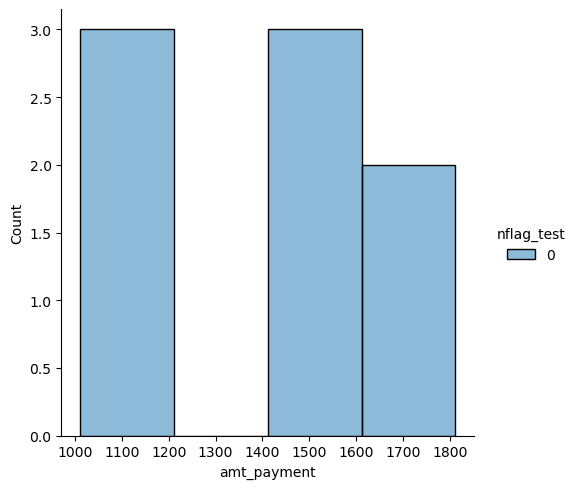

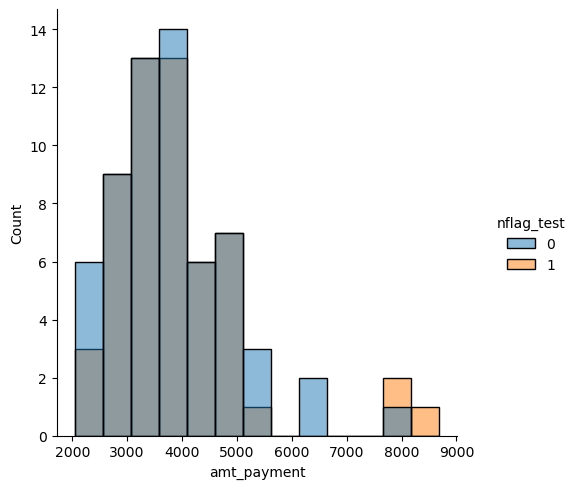

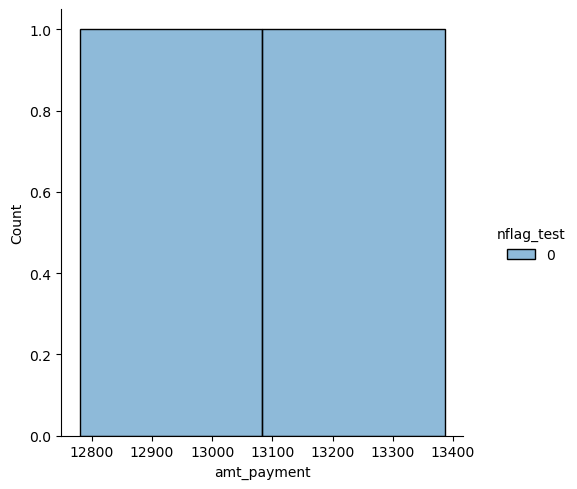

Саратов

Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  80.0 0.968450028951438
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  82.0 0.8079974055696059
Тольятти

Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  88.0 0.1333273246710206
Владимир

Гипотеза H0 не подтверждается: средние не равны
Разница средних =  2108.6101973684213 2547.2200392927307
Номер торговой точки =  11.0 0.010095112170351712
Номер торговой точки =  11.0 Small Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  11.0 Middle Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  11.0 Big Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0


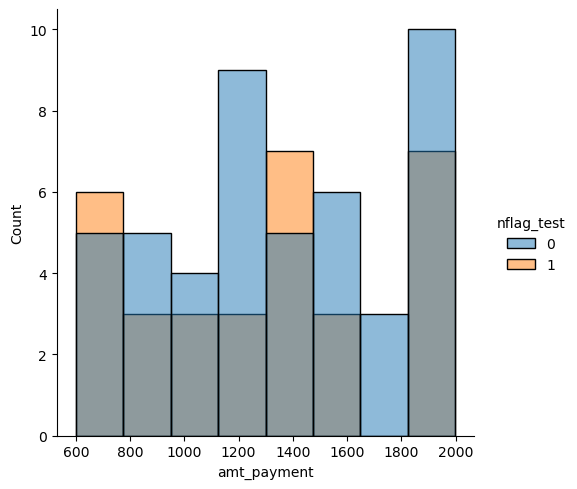

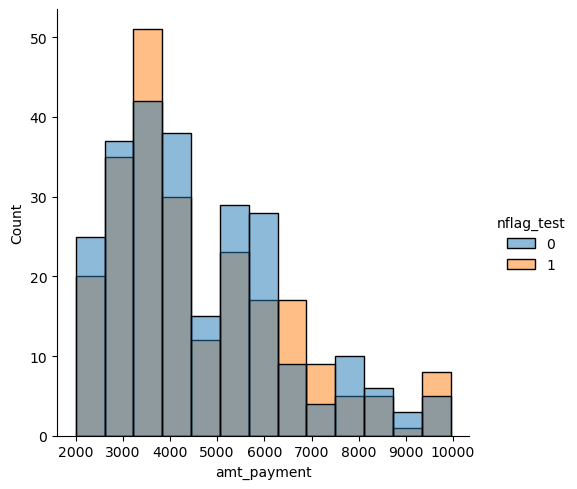

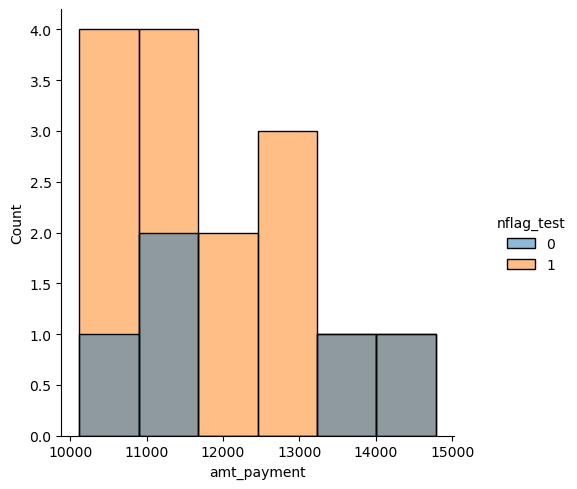

Мурманск

Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  55.0 0.9910124894120407
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  54.0 0.922300518333421
Красноярск

Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  212.0 0.6287709476405416
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  277.0 0.3264127897793312
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  202.0 0.24830826390447136
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  444.0 0.3808017001028422
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  278.0 0.06901056074583502
Казань

Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  477.0 0.3728909035918657
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торгов

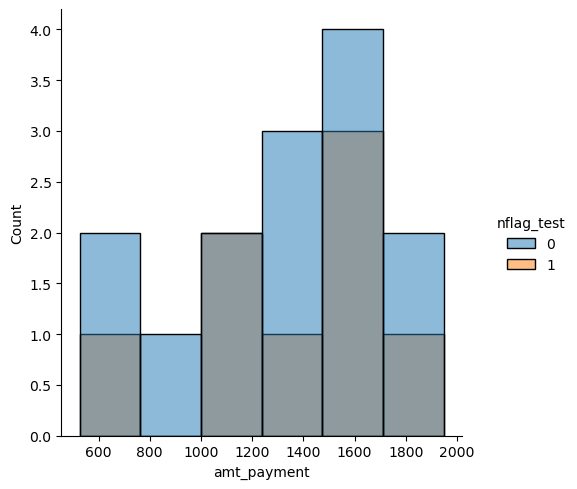

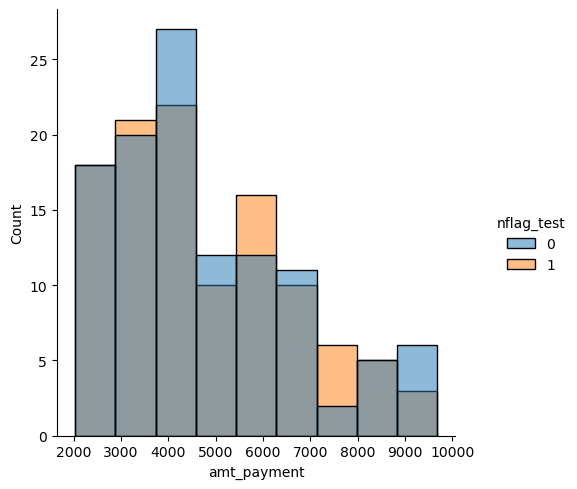

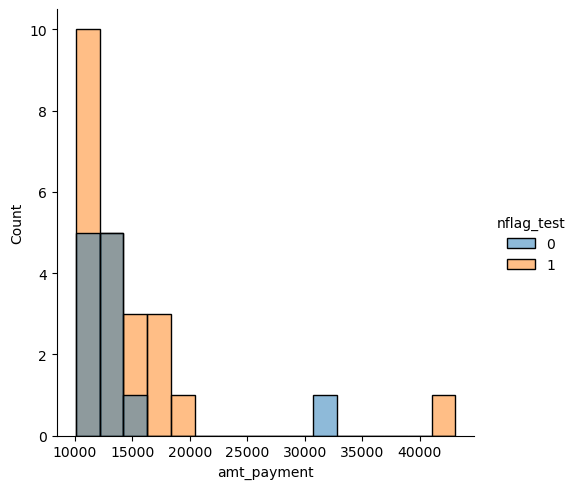

Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  516.0 0.1297970685161915
Самара

Гипотеза H0 не подтверждается: средние не равны
Разница средних =  2311.3875968992247 4598.2198275862065
Номер торговой точки =  33.0 7.222518974571453e-20
Номер торговой точки =  33.0 Small Check
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  279.2834645669291 889.4
Номер торговой точки =  33.0 Middle Check
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  4187.007751937985 4702.276243093923
Номер торговой точки =  33.0 Big Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0


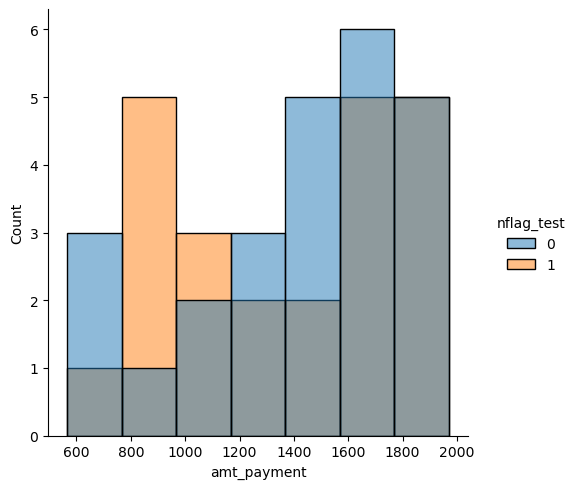

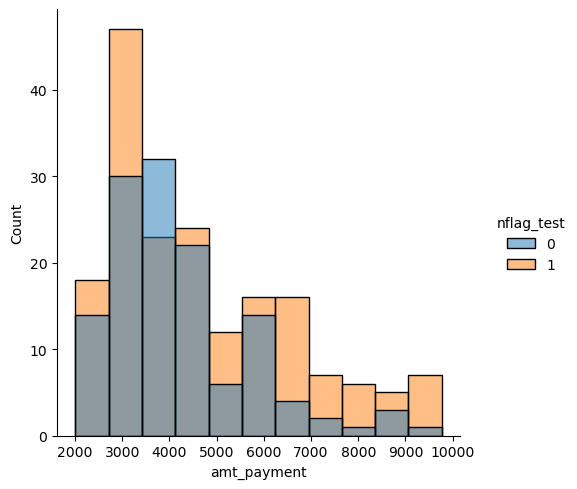

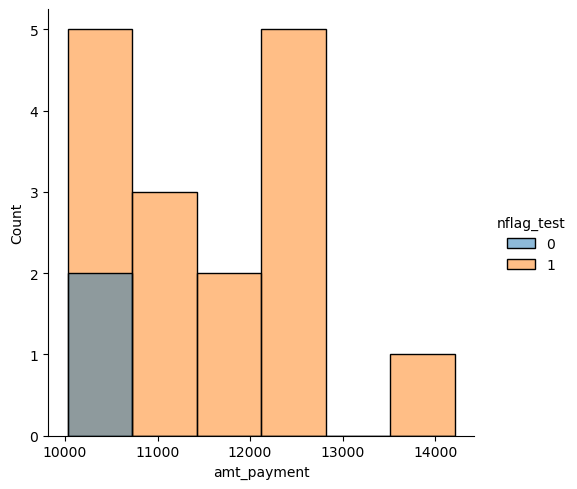

Гипотеза H0 не подтверждается: средние не равны
Разница средних =  1752.608695652174 3104.5066666666667
Номер торговой точки =  34.0 1.1327785130388307e-07
Номер торговой точки =  34.0 Small Check
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  135.04907975460122 284.0232558139535
Номер торговой точки =  34.0 Middle Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  34.0 Big Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0


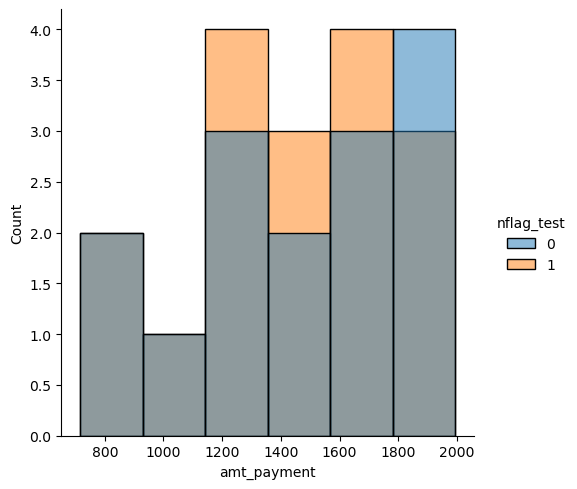

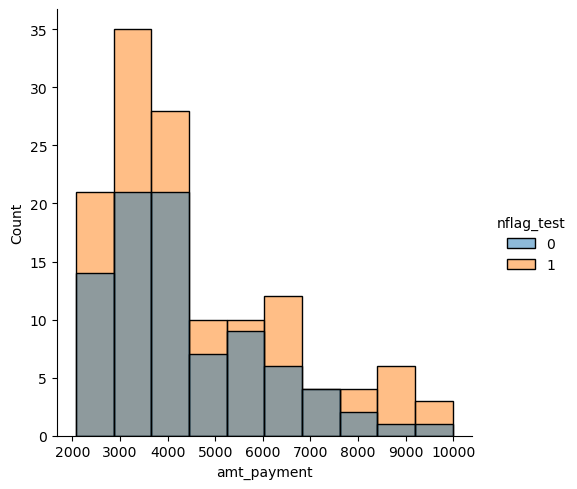

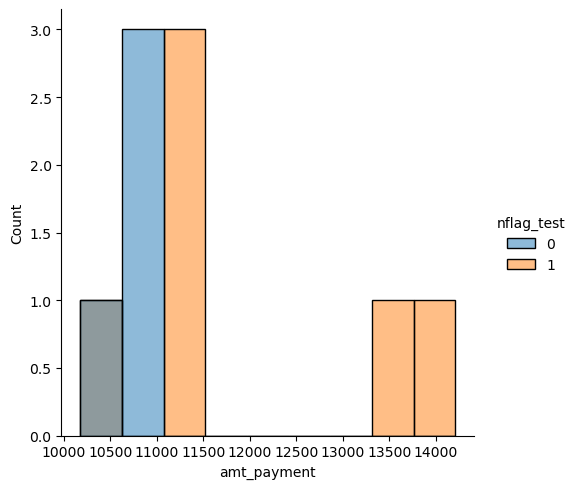

Гипотеза H0 не подтверждается: средние не равны
Разница средних =  1508.8350515463917 2762.2242990654204
Номер торговой точки =  35.0 2.1646756758588107e-06
Номер торговой точки =  35.0 Small Check
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  132.03100775193798 281.52127659574467
Номер торговой точки =  35.0 Middle Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  35.0 Big Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0


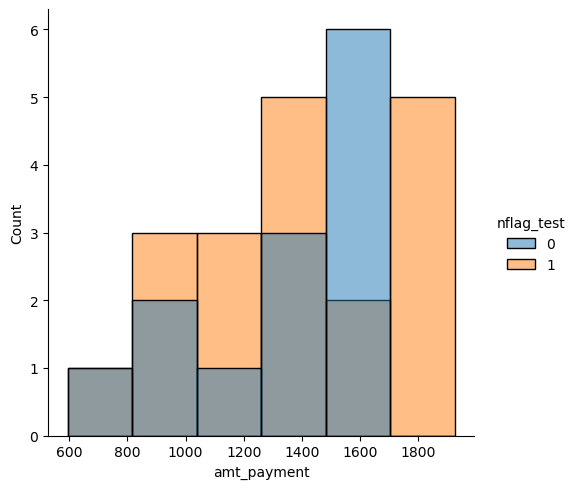

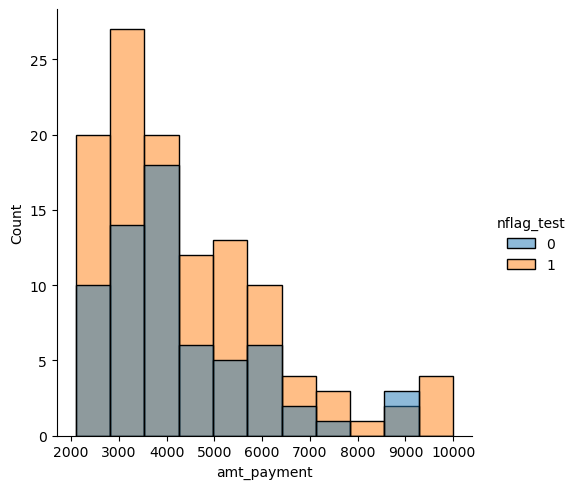

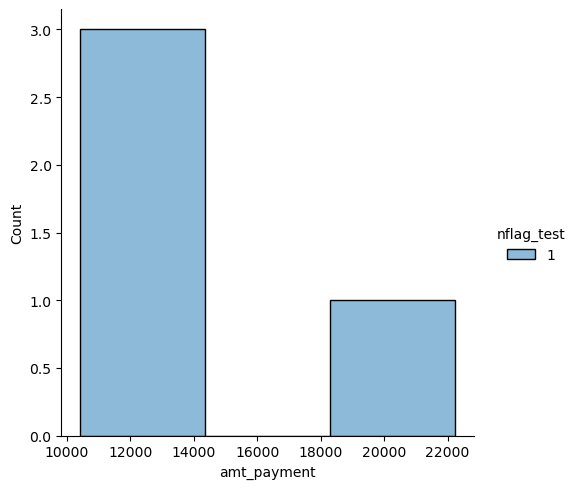

Гипотеза H0 не подтверждается: средние не равны
Разница средних =  860.418439716312 1987.328244274809
Номер торговой точки =  36.0 7.318758090993358e-05
Номер торговой точки =  36.0 Small Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  36.0 Middle Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  36.0 Big Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0


C:\Users\Roman\AppData\Local\Temp\ipykernel_21300\3010995031.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  s, p = ttest_ind(r1, r2)
C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


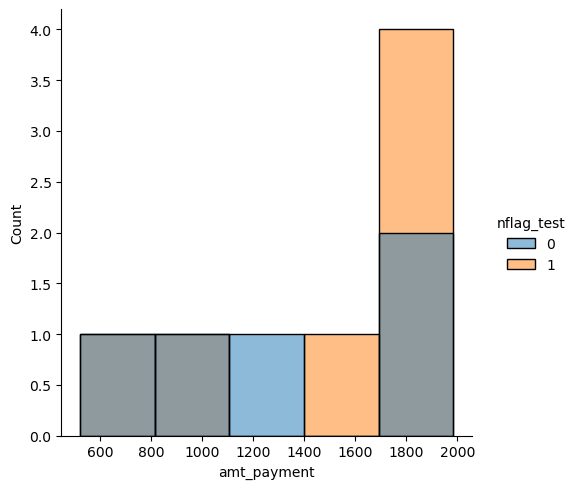

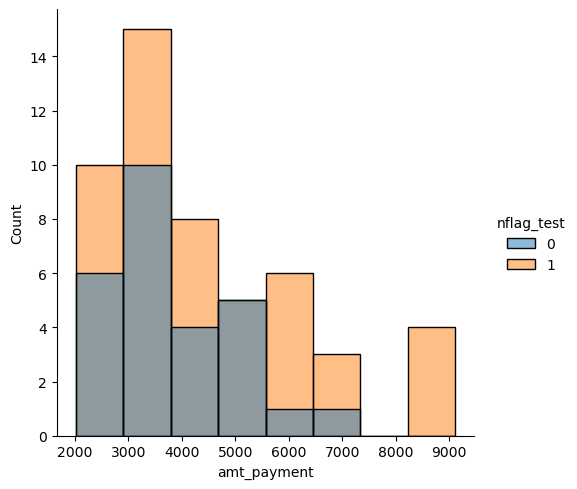

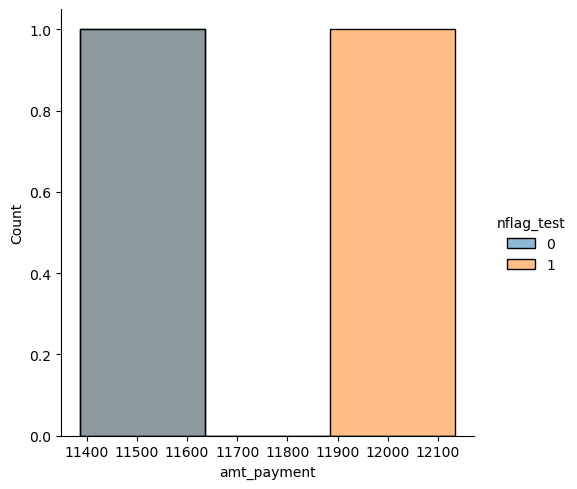

Волгоград

Гипотеза H0 не подтверждается: средние не равны
Разница средних =  2601.7610241820767 2288.8706240487063
Номер торговой точки =  66.0 0.03686899928098654
Номер торговой точки =  66.0 Small Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  66.0 Middle Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  66.0 Big Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0


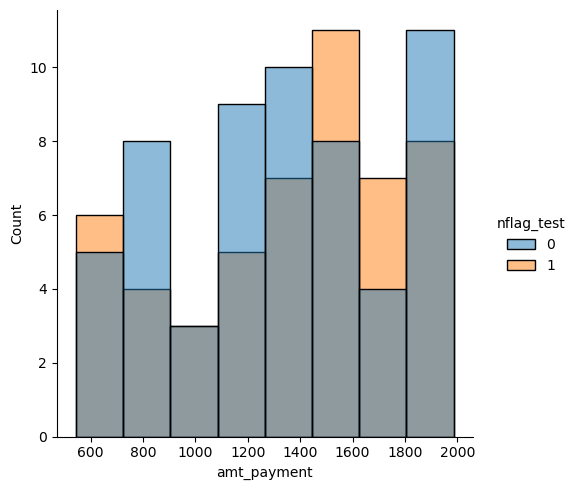

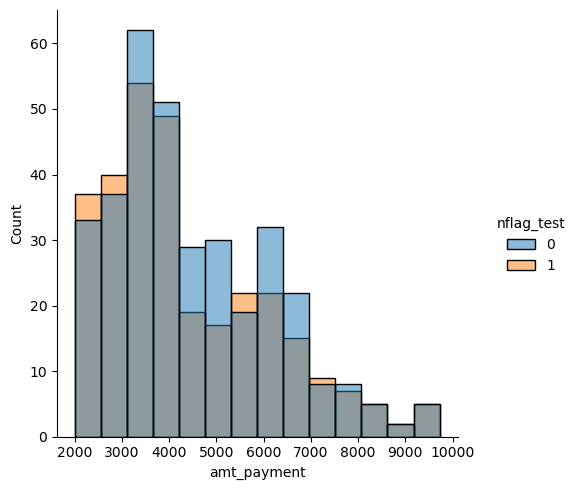

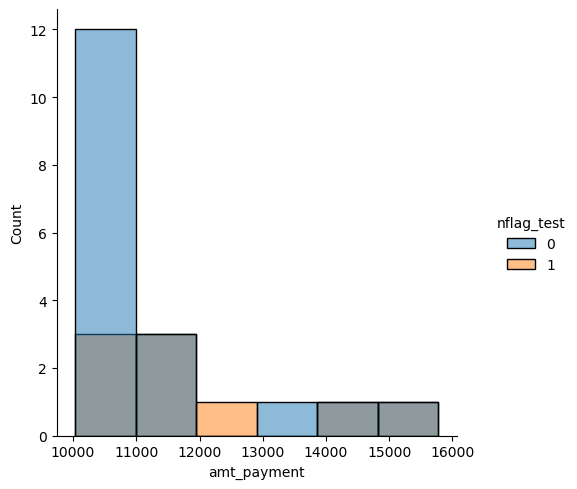

Сочи

Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  72.0 0.3467675852041211
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  73.0 0.13559014690618418
Краснодар

Гипотеза H0 не подтверждается: средние не равны
Разница средних =  2523.5788262370543 2176.003821656051
Номер торговой точки =  1101.0 0.013358447618918195
Номер торговой точки =  1101.0 Small Check
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  200.37276785714286 133.270207852194
Номер торговой точки =  1101.0 Middle Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  1101.0 Big Check
Гипотеза H0  подтверждается: средние равны
Разница средних = 0


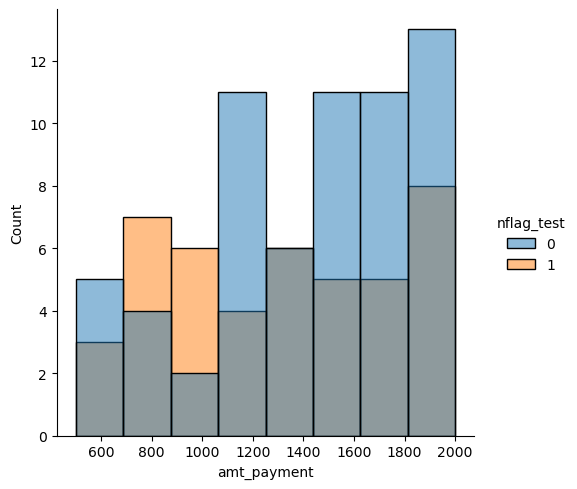

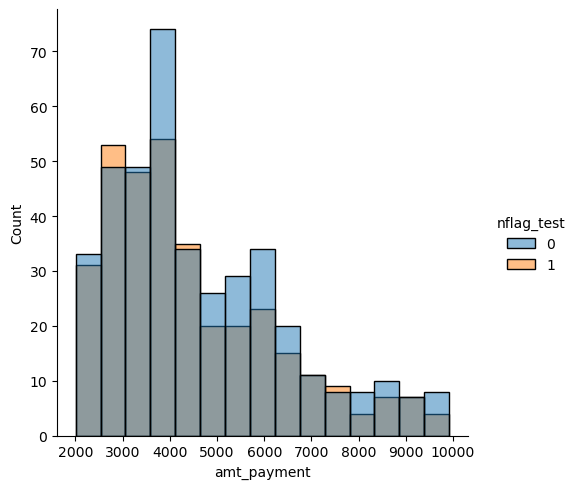

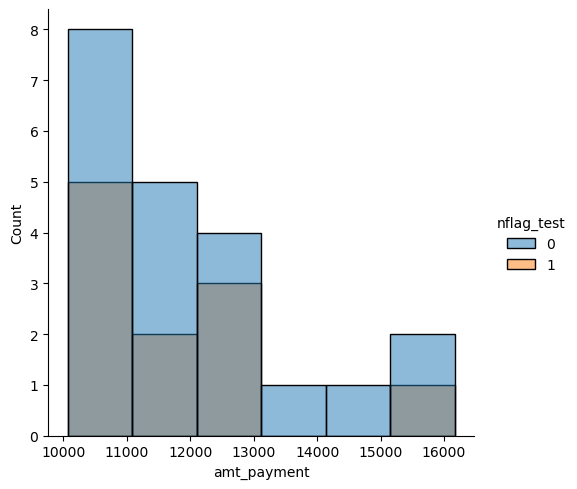

Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  1989.0 0.29422131648059047
Дмитров

Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  2.0 0.7410763125801646
Тюмень

Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  19.0 0.3550227648604757
Сахалинск

Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Номер торговой точки =  69.0 0.105809212549273


In [146]:
all_cities = list(df_fin['city'].unique())
for i in all_cities:
    print(i)
    print()
    df_city = df_fin[df_fin['city']==i]
    
    test_calc(df_city[df_city['nflag_test']==0]['amt_payment'], df_city[df_city['nflag_test']==1]['amt_payment'])
    test_calc(df_city[df_city['nflag_test']==0]['nflag_paid'], df_city[df_city['nflag_test']==1]['nflag_paid'])
    
    sns.displot(df_city[df_city['amt_payment'] > 0], x = 'amt_payment', hue = 'nflag_test')
    plt.show()
    
    print('Номер торговой точки = ', i, 'Small Check')
    sns.displot(df_city[(df_city['amt_payment'] > 0)&(df_city['nflag_check']=='Small')], x = 'amt_payment', hue = 'nflag_test')
    test_calc(df_city[(df_city['nflag_test']==0)&(df_city['nflag_check']=='Small')]['amt_payment'], df_city[(df_city['nflag_test']==1)&(df_city['nflag_check']=='Small')]['amt_payment'])
    
    print('Номер торговой точки = ', i, 'Middle Check')
    sns.displot(df_city[(df_city['amt_payment'] > 0)&(df_city['nflag_check']=='Middle')], x = 'amt_payment', hue = 'nflag_test')
    test_calc(df_city[(df_city['nflag_test']==0)&(df_city['nflag_check']=='Middle')]['amt_payment'], df_city[(df_city['nflag_test']==1)&(df_city['nflag_check']=='Middle')]['amt_payment'])
        
    print('Номер торговой точки = ', i, 'Big Check')
    sns.displot(df_city[(df_city['amt_payment'] > 0)&(df_city['nflag_check']=='Big')], x = 'amt_payment', hue = 'nflag_test')
    test_calc(df_city[(df_city['nflag_test']==0)&(df_city['nflag_check']=='Big')]['amt_payment'], df_city[(df_city['nflag_test']==1)&(df_city['nflag_check']=='Big')]['amt_payment'])

    

    
    for j in df_city['id_trading_point'].unique():
        df_loc = df_city[df_city['id_trading_point']==j]
        
        
        #sns.displot(df_loc[df_loc['amt_payment'] > 0], x = 'amt_payment', hue = 'nflag_test')
        t_a, t_p=test_calc(df_loc[df_loc['nflag_test']==0]['amt_payment'], df_loc[df_loc['nflag_test']==1]['amt_payment'])
        print('Номер торговой точки = ', j, t_p)
        
        if abs(t_p)<0.05:
        
            print('Номер торговой точки = ', j, 'Small Check')
            sns.displot(df_loc[(df_loc['amt_payment'] > 0)&(df_loc['nflag_check']=='Small')], x = 'amt_payment', hue = 'nflag_test')
            test_calc(df_loc[(df_loc['nflag_test']==0)&(df_loc['nflag_check']=='Small')]['amt_payment'], df_loc[(df_loc['nflag_test']==1)&(df_loc['nflag_check']=='Small')]['amt_payment'])

            print('Номер торговой точки = ', j, 'Middle Check')
            sns.displot(df_loc[(df_loc['amt_payment'] > 0)&(df_loc['nflag_check']=='Middle')], x = 'amt_payment', hue = 'nflag_test')
            test_calc(df_loc[(df_loc['nflag_test']==0)&(df_loc['nflag_check']=='Middle')]['amt_payment'], df_loc[(df_loc['nflag_test']==1)&(df_loc['nflag_check']=='Middle')]['amt_payment'])

            print('Номер торговой точки = ', j, 'Big Check')
            sns.displot(df_loc[(df_loc['amt_payment'] > 0)&(df_loc['nflag_check']=='Big')], x = 'amt_payment', hue = 'nflag_test')
            test_calc(df_loc[(df_loc['nflag_test']==0)&(df_loc['nflag_check']=='Big')]['amt_payment'], df_loc[(df_loc['nflag_test']==1)&(df_loc['nflag_check']=='Big')]['amt_payment'])
        
        #test_calc(df_loc[df_loc['nflag_test']==0]['nflag_paid'], df_loc[df_loc['nflag_test']==1]['nflag_paid'])
            plt.show()

# 7. Отчет по АБ Тесту

In [91]:
'''- city - город
- id_trading_point  - уникальный идентификатор торговой точки, к которой прикреплен данный пользователь
- count_test - кол-во наблюдений в тестовой группе
- count_control - кол-во наблюдений в контрольной группе
- count_all - суммарное кол-во наблюдений
- percent_count - процент кол-ва наблюдений данной ТТ от всех наблюдений
- avg_payment_test - средний платеж в тестовой группе
- avg_payment_control - средний платеж в контрольной группе
- diff - разница между средними платежами
- sigma_test - стандартное отклонение платежей в тестовой группе
- sigma_control - стандартное отклонение платежей в контрольной группе
- ttest - значение статистического критерия (критерий Стьюдента для сравнения средних платежей)
- pvalue_ttest - pvalue статистического критерия (критерий Стьюдента для сравнения средних платежей)

В таблице также должен присутствовать флаг (лейбл), по которому можно будет разделить торговые точки по результатам эксперимента
- Если результат (поле diff) положительный, и разница на самом деле есть (на основании p_value), то это положительный исход
- Если результат (поле diff) отрицательный, и разница на самом деле есть (на основании p_value), то это отрицательный исход
- Если разницы на самом деле нет (на основании p_value), то это нейтральный исход'''

'- city - город\n- id_trading_point  - уникальный идентификатор торговой точки, к которой прикреплен данный пользователь\n- count_test - кол-во наблюдений в тестовой группе\n- count_control - кол-во наблюдений в контрольной группе\n- count_all - суммарное кол-во наблюдений\n- percent_count - процент кол-ва наблюдений данной ТТ от всех наблюдений\n- avg_payment_test - средний платеж в тестовой группе\n- avg_payment_control - средний платеж в контрольной группе\n- diff - разница между средними платежами\n- sigma_test - стандартное отклонение платежей в тестовой группе\n- sigma_control - стандартное отклонение платежей в контрольной группе\n- ttest - значение статистического критерия (критерий Стьюдента для сравнения средних платежей)\n- pvalue_ttest - pvalue статистического критерия (критерий Стьюдента для сравнения средних платежей)\n\nВ таблице также должен присутствовать флаг (лейбл), по которому можно будет разделить торговые точки по результатам эксперимента\n- Если результат (поле 

In [92]:
df_result = pd.DataFrame()
for i in df_fin['city'].unique():
    df_loc = df_fin[df_fin['city']==i]
    
    for j in  df_loc['id_trading_point'].unique():
                             
        df_loc_f = df_loc[df_loc['id_trading_point']==j]
                             
        count_test = len(df_loc_f[df_loc_f['nflag_test']==1])
        count_control = len(df_loc_f[df_loc_f['nflag_test']==1])
        count_all = count_test + count_control
        sigma_test = df_loc_f[df_loc_f['nflag_test']==1]['amt_payment'].std()
        sigma_control = df_loc_f[df_loc_f['nflag_test']==0]['amt_payment'].std()
        avg_payment_test = np.mean(df_loc_f[df_loc_f['nflag_test']==1]['amt_payment'])
        avg_payment_control = np.mean(df_loc_f[df_loc_f['nflag_test']==0]['amt_payment'])
        diff = avg_payment_test - avg_payment_control
    
        s_a, p_a =test_calc(df_loc_f[df_loc_f['nflag_test']==1]['amt_payment'], df_loc_f[df_loc_f['nflag_test']==0]['amt_payment'])
        
        
        df_result = df_result.append({'city':i, 'id_trading_point':j
                                     ,'count_test':count_test, 'count_control':count_control, 'count_all':count_all
                                     ,'avg_payment_test':avg_payment_test
                                     ,'avg_payment_control':avg_payment_control,'sigma_test':sigma_test
                                     ,'sigma_control':sigma_control, 'diff':diff,'abs_test_s':s_a
                                     ,'abs_test_p':p_a}, ignore_index = True)
        
        
    

Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  2929.045197740113 2252.35
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  2506.616805983282 1972.8476793248944
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  2128.556756756757 1394.6554621848738
Гипоте

C:\Users\Roman\AppData\Local\Temp\ipykernel_21300\1703353613.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'city':i, 'id_trading_point':j
C:\Users\Roman\AppData\Local\Temp\ipykernel_21300\1703353613.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'city':i, 'id_trading_point':j
C:\Users\Roman\AppData\Local\Temp\ipykernel_21300\1703353613.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'city':i, 'id_trading_point':j
C:\Users\Roman\AppData\Local\Temp\ipykernel_21300\1703353613.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_re

Гипотеза H0 не подтверждается: средние не равны
Разница средних =  4121.753623188406 1844.787234042553
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  1415.7843137254902 1968.6934306569342
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  2547.2200392927307 2108.6101973684213
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0  подтверждается: средние равны
Разница средни

C:\Users\Roman\AppData\Local\Temp\ipykernel_21300\1703353613.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'city':i, 'id_trading_point':j
C:\Users\Roman\AppData\Local\Temp\ipykernel_21300\1703353613.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'city':i, 'id_trading_point':j
C:\Users\Roman\AppData\Local\Temp\ipykernel_21300\1703353613.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'city':i, 'id_trading_point':j
C:\Users\Roman\AppData\Local\Temp\ipykernel_21300\1703353613.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_re

Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  3249.2814814814815 2452.986394557823
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  4598.2198275862065 2311.3875968992247
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  3104.5066666666667 1752.608695652174
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  2762.2242990654204 1508.8350515463917
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  1987.328244274809 860.418439716312
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  2288.8706240487063 2601.7610241820767
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0  подтверждается: средние равны
Разница средних = 0
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  2176.003821656051 2523.5788262370543
Гипотеза H0  подтве

C:\Users\Roman\AppData\Local\Temp\ipykernel_21300\1703353613.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'city':i, 'id_trading_point':j
C:\Users\Roman\AppData\Local\Temp\ipykernel_21300\1703353613.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'city':i, 'id_trading_point':j
C:\Users\Roman\AppData\Local\Temp\ipykernel_21300\1703353613.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'city':i, 'id_trading_point':j
C:\Users\Roman\AppData\Local\Temp\ipykernel_21300\1703353613.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_re

In [93]:
df_result

,city,id_trading_point,count_test,count_control,count_all,avg_payment_test,avg_payment_control,sigma_test,sigma_control,diff,abs_test_s,abs_test_p
0,Санкт-Петербург,453.0,1066,1066,2132,2501.966229,2420.415634,2993.442540,2890.088044,81.550595,0.637238,5.240386e-01
1,Санкт-Петербург,112.0,652,652,1304,2488.115031,2776.241581,2778.179183,3057.040898,-288.126551,-1.799588,7.215174e-02
2,Санкт-Петербург,117.0,625,625,1250,2582.297600,2592.086882,2835.004503,2813.867330,-9.789282,-0.060294,9.519316e-01
3,Санкт-Петербург,309.0,240,240,480,2706.279167,3003.789916,2814.939849,3077.161555,-297.510749,-1.103047,2.705641e-01
4,Санкт-Петербург,576.0,630,630,1260,1594.436508,1760.296804,2683.727211,2815.093171,-165.860296,-1.080998,2.799008e-01
5,Санкт-Петербург,900.0,335,335,670,2450.991045,2299.768328,2865.607356,2878.774167,151.222716,0.684416,4.939479e-01
6,Санкт-Петербург,213.0,232,232,464,2977.629310,2857.058824,2905.494362,2845.245598,120.570487,0.462369,6.440239e-01
7,Санкт-Петербург,801.0,225,225,450,2925.142222,2980.155660,2774.292063,3049.074475,-55.013438,-0.197457,8.435623e-01
8,Санкт-Петербург,573.0,177,177,354,2929.045198,2252.350000,3201.098137,2975.544726,676.695198,2.003598,4.591805e-02
9,Санкт-Петербург,891.0,159,159,318,2618.949686,2495.455090,2899.782464,2893.862408,123.494596,0.384755,7.006710e-01


In [94]:
df_result['percent_count'] = df_result['count_all']/df_result['count_all'].sum()

In [95]:
df_result

,city,id_trading_point,count_test,count_control,count_all,avg_payment_test,avg_payment_control,sigma_test,sigma_control,diff,abs_test_s,abs_test_p,percent_count
0,Санкт-Петербург,453.0,1066,1066,2132,2501.966229,2420.415634,2993.442540,2890.088044,81.550595,0.637238,5.240386e-01,0.047494
1,Санкт-Петербург,112.0,652,652,1304,2488.115031,2776.241581,2778.179183,3057.040898,-288.126551,-1.799588,7.215174e-02,0.029049
2,Санкт-Петербург,117.0,625,625,1250,2582.297600,2592.086882,2835.004503,2813.867330,-9.789282,-0.060294,9.519316e-01,0.027846
3,Санкт-Петербург,309.0,240,240,480,2706.279167,3003.789916,2814.939849,3077.161555,-297.510749,-1.103047,2.705641e-01,0.010693
4,Санкт-Петербург,576.0,630,630,1260,1594.436508,1760.296804,2683.727211,2815.093171,-165.860296,-1.080998,2.799008e-01,0.028069
5,Санкт-Петербург,900.0,335,335,670,2450.991045,2299.768328,2865.607356,2878.774167,151.222716,0.684416,4.939479e-01,0.014925
6,Санкт-Петербург,213.0,232,232,464,2977.629310,2857.058824,2905.494362,2845.245598,120.570487,0.462369,6.440239e-01,0.010336
7,Санкт-Петербург,801.0,225,225,450,2925.142222,2980.155660,2774.292063,3049.074475,-55.013438,-0.197457,8.435623e-01,0.010025
8,Санкт-Петербург,573.0,177,177,354,2929.045198,2252.350000,3201.098137,2975.544726,676.695198,2.003598,4.591805e-02,0.007886
9,Санкт-Петербург,891.0,159,159,318,2618.949686,2495.455090,2899.782464,2893.862408,123.494596,0.384755,7.006710e-01,0.007084


In [96]:
df_result['nflag_diff'] = np.where((df_result['abs_test_p'] < .05) & (df_result['diff']>0), 'Positive'
                                   ,np.where((df_result['abs_test_p'] < .05) & (df_result['diff']<0), 'Negative', 'No diff'))

In [97]:
df_result

,city,id_trading_point,count_test,count_control,count_all,avg_payment_test,avg_payment_control,sigma_test,sigma_control,diff,abs_test_s,abs_test_p,percent_count,nflag_diff
0,Санкт-Петербург,453.0,1066,1066,2132,2501.966229,2420.415634,2993.442540,2890.088044,81.550595,0.637238,5.240386e-01,0.047494,No diff
1,Санкт-Петербург,112.0,652,652,1304,2488.115031,2776.241581,2778.179183,3057.040898,-288.126551,-1.799588,7.215174e-02,0.029049,No diff
2,Санкт-Петербург,117.0,625,625,1250,2582.297600,2592.086882,2835.004503,2813.867330,-9.789282,-0.060294,9.519316e-01,0.027846,No diff
3,Санкт-Петербург,309.0,240,240,480,2706.279167,3003.789916,2814.939849,3077.161555,-297.510749,-1.103047,2.705641e-01,0.010693,No diff
4,Санкт-Петербург,576.0,630,630,1260,1594.436508,1760.296804,2683.727211,2815.093171,-165.860296,-1.080998,2.799008e-01,0.028069,No diff
5,Санкт-Петербург,900.0,335,335,670,2450.991045,2299.768328,2865.607356,2878.774167,151.222716,0.684416,4.939479e-01,0.014925,No diff
6,Санкт-Петербург,213.0,232,232,464,2977.629310,2857.058824,2905.494362,2845.245598,120.570487,0.462369,6.440239e-01,0.010336,No diff
7,Санкт-Петербург,801.0,225,225,450,2925.142222,2980.155660,2774.292063,3049.074475,-55.013438,-0.197457,8.435623e-01,0.010025,No diff
8,Санкт-Петербург,573.0,177,177,354,2929.045198,2252.350000,3201.098137,2975.544726,676.695198,2.003598,4.591805e-02,0.007886,Positive
9,Санкт-Петербург,891.0,159,159,318,2618.949686,2495.455090,2899.782464,2893.862408,123.494596,0.384755,7.006710e-01,0.007084,No diff


In [98]:

writer = pd.ExcelWriter("Калкулятор диплом.xlsx", engine="xlsxwriter")

df_result[df_result['nflag_diff']=='Positive'].to_excel(writer, sheet_name='Успешные ТТ', index = False)
df_result[df_result['nflag_diff']=='Negative'].to_excel(writer, sheet_name='Неуспешные ТТ', index = False)
df_result[df_result['nflag_diff']=='No diff'].to_excel(writer, sheet_name='Равнозначные ТТ', index = False)

writer.close()